## LAB 9: Design and Analysis of Algorithms
Name: Rudra Shah <br>
Roll Number: 21BCM054
##### Q9. Analyze the working of Branch and Bound Technique. Solving N-Queen problem using Branch and Bound Technique.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [133]:
n = 4
grid = n*n
print(n,grid)

4 16


### Algorithm

In [134]:
output = []

board = [['.']*n for i in range(n)]

queenColumn = {}
queenRow = {}
queenDiagonalLeft = {}
queenDiagonalRight = {}

def valid(row, col):
    return not (row in queenRow or col in queenColumn or row + col in queenDiagonalLeft or row - col in queenDiagonalRight)

def backtrack(row):
    if row == n:
        newBoard = []
        for i in range(n):
            newBoard.append(''.join(board[i]))
        output.append(newBoard)
        return
    for i in range(n):
        if valid(row,i):
            queenColumn[i] = True
            queenRow[row] = True
            queenDiagonalLeft[row+i] = True
            queenDiagonalRight[row-i] = True
            board[row][i] = 'Q'
            backtrack(row+1)
            board[row][i] = '.'
            queenColumn.pop(i)
            queenRow.pop(row)
            queenDiagonalLeft.pop(row+i)
            queenDiagonalRight.pop(row-i)
backtrack(0)
print("Number Of possible Ways:",len(output))

Number Of possible Ways: 2


### Visual Representation

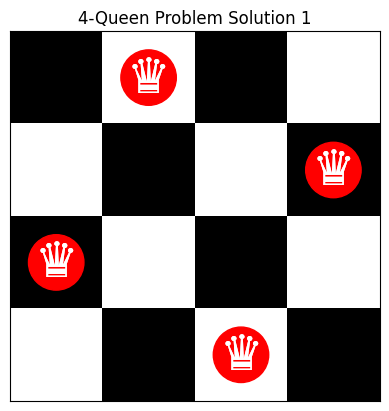

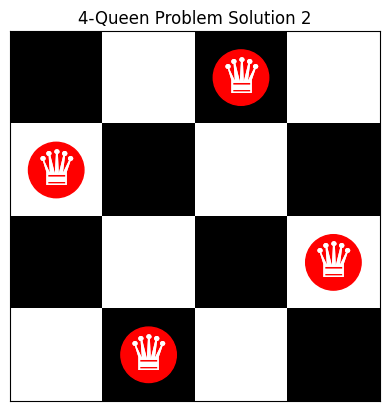

In [135]:
dx, dy = 0.016, 0.06
P = np.arange(-5.0, 5.0, dx)
Q = np.arange(-5.0, 5.0, dy)
P, Q = np.meshgrid(P, Q)

for i in range(len(output)):
    fig, ax = plt.subplots()
    for j in range(n):
        for k in range(n):
            if output[i][j][k] == 'Q':
                circle2 = plt.Circle((k, j), (n-1)/10, color='r')
                circle1 = plt.text(k, j, '♛', ha='center', va='center', fontsize=((n)*10)-5, color='white')
                ax.add_artist(circle1)
                ax.add_artist(circle2)
    min_max = np.min(P), np.max(P), np.min(Q), np.max(Q)
    res = np.add.outer(range(n), range(n)) % 2
    plt.imshow(res, cmap="binary_r")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{n}-Queen Problem Solution {i+1}")
    plt.show()